<a href="https://colab.research.google.com/github/deeagjin/Project-2-Data-Science/blob/main/Assignment_1_P138002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In today's world, many of us use credit cards for buying things online and in stores. But, there's a problem: some people try to cheat and use credit cards in bad ways, like stealing card numbers or making fake transactions. This is called credit card fraud, and it's a big headache for banks and people who own credit cards.

To stop fraud from happening, banks and companies use fancy computer programs to look at all the transactions made with credit cards. They try to find patterns that might be signs of fraud. But fraudsters are smart too, and they keep changing their tricks to avoid getting caught.

So, in this study, we're going to look at a lot of data about credit card transactions. We want to use computer programs to find hidden patterns that can help us catch fraudsters earlier. We'll look at things like how much money was spent, when the transactions happened, and where they took place. Our goal is to make better computer programs that can tell the difference between real transactions and fake ones.

This research isn't just for banks—it's important for everyone who uses credit cards. By stopping fraud, we can help protect people's money and make buying things online safer for everyone. Our study is part of a bigger effort to fight credit card fraud and make sure everyone's money stays safe.

# **Problem Statement**

Credit card fraud poses a significant threat to both financial institutions and consumers, resulting in substantial financial losses and reputational damage. Traditional rule-based fraud detection systems often struggle to keep pace with evolving fraud tactics and may generate a high number of false positives, leading to inefficient resource allocation and customer inconvenience. The challenge lies in effectively distinguishing between legitimate and fraudulent transactions in real-time, while minimizing false positives and ensuring a seamless user experience. Therefore, the main problem addressed in this analysis is to develop accurate and efficient machine learning models for detecting credit card fraud, thereby enhancing fraud detection capabilities and reducing the impact of fraudulent activities on financial institutions and consumers.

# **Objectives**

The primary objectives of this analysis are as follows:

1. To explore and understand the characteristics of credit card transactions, including transaction amounts, time of transactions, and other relevant features.
2. To identify patterns and trends associated with fraudulent transactions, such as unusual spending patterns or transactions occurring at unusual times.
3. To develop and train models capable of accurately detecting fraudulent transactions based on the identified patterns and features.
4. To provide recommendations and insights for financial institutions to enhance their fraud detection systems and mitigate the risk of credit card fraud.

# **Data Cleaning**



In [2]:
import pandas as pd

In [6]:

# Load the dataset
credit_card_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [5]:
# Explore and understand the data
print(credit_card_data.head())
print(credit_card_data.info())
print(credit_card_data.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
# Check for missing values
print("Missing Values:")
print(credit_card_data.isnull().sum())

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
# Check for duplicate rows
print("\nDuplicate Rows:", credit_card_data.duplicated().sum())


Duplicate Rows: 1081


In [9]:
# Remove duplicate rows
credit_card_data.drop_duplicates(inplace=True)

# Check again for duplicate rows
print("\nDuplicate Rows after removal:", credit_card_data.duplicated().sum())


Duplicate Rows after removal: 0


# **Data Visualization**


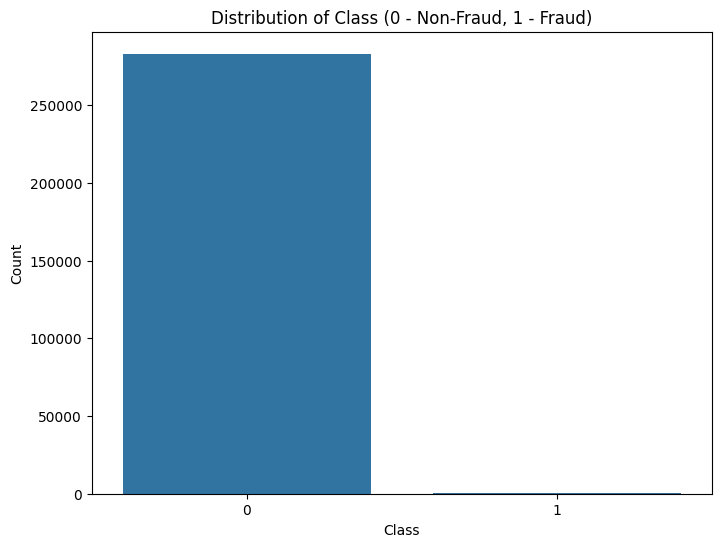

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable (Class: 0 - Non-Fraud, 1 - Fraud)
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=credit_card_data)
plt.title('Distribution of Class (0 - Non-Fraud, 1 - Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

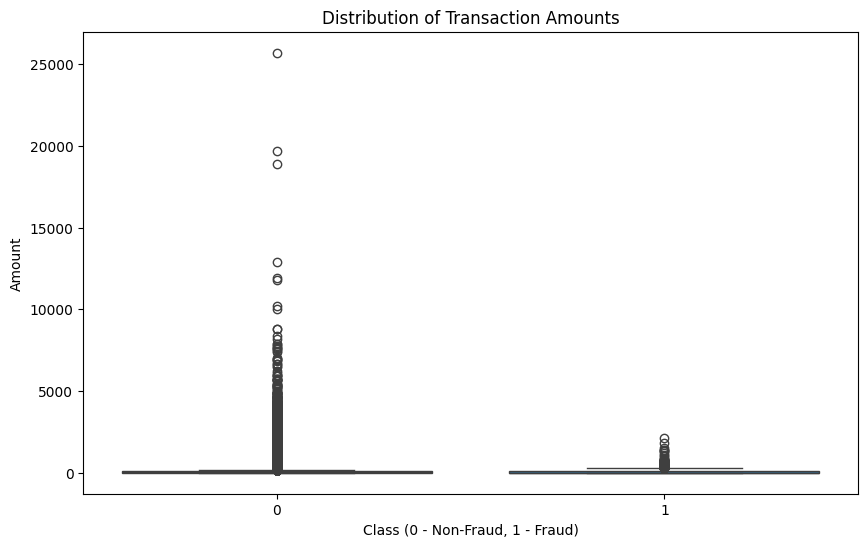

In [12]:
# Distribution of transaction amounts for non-fraudulent and fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card_data)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Class (0 - Non-Fraud, 1 - Fraud)')
plt.ylabel('Amount')
plt.show()

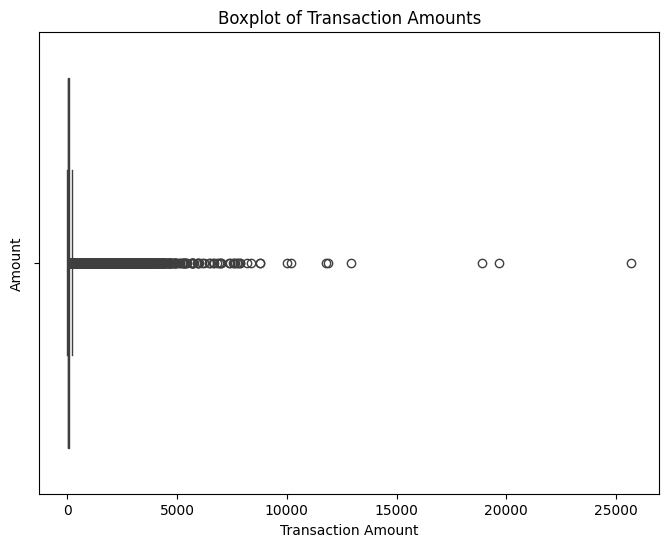

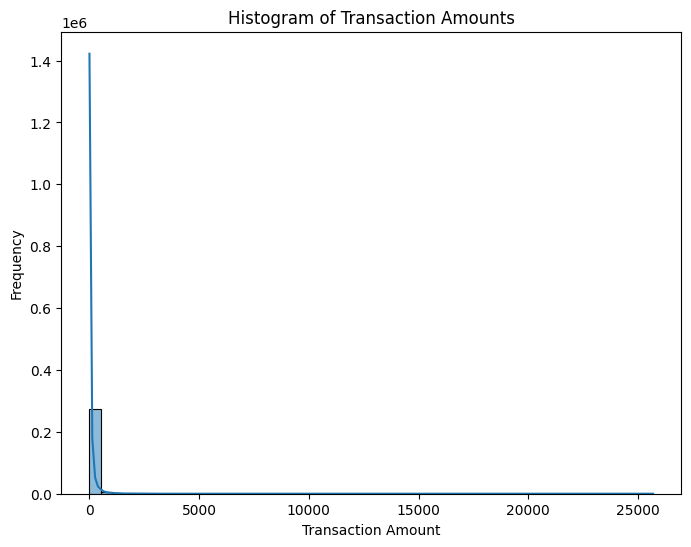

In [15]:
# Plot a boxplot to visualize outliers in the 'Amount' column
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amount', data=credit_card_data)
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Amount')
plt.show()

# Plot histogram of transaction amounts to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(credit_card_data['Amount'], bins=50, kde=True)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()



In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

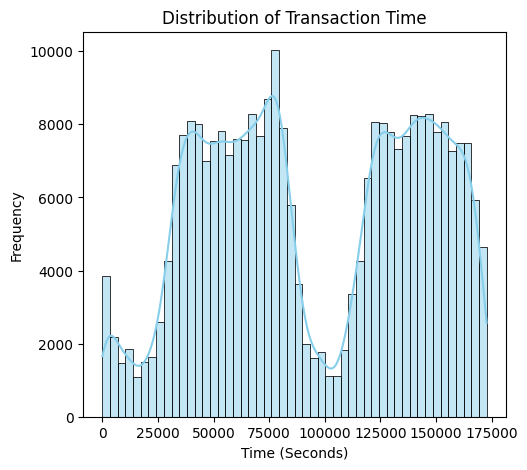

In [19]:
# Plot histograms for 'Time' and 'Amount' variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(credit_card_data['Time'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')

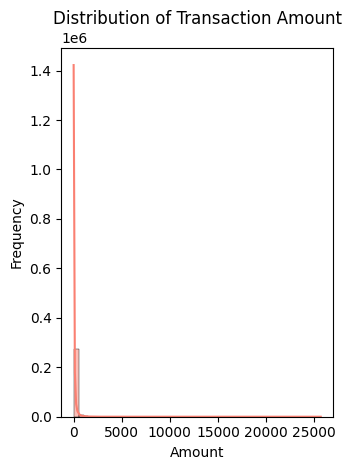

In [20]:
plt.subplot(1, 2, 2)
sns.histplot(credit_card_data['Amount'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-21-fa35a1283b25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=credit_card_data, palette='Set2')


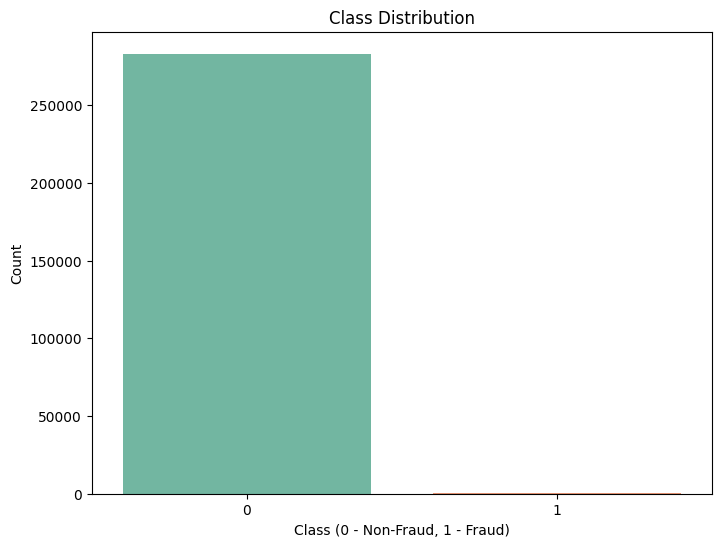

In [21]:
# Plot count plot for 'Class' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=credit_card_data, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Class (0 - Non-Fraud, 1 - Fraud)')
plt.ylabel('Count')
plt.show()

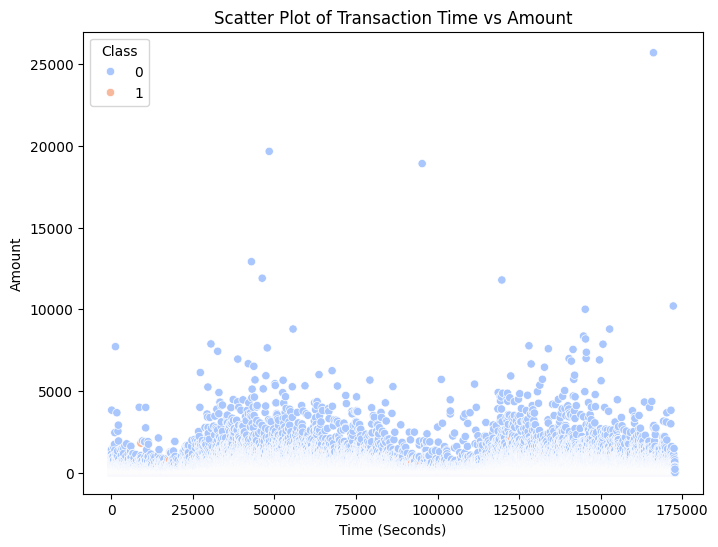

In [22]:
# Plot scatter plot to explore relationship between 'Time' and 'Amount' variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time', y='Amount', data=credit_card_data, hue='Class', palette='coolwarm')
plt.title('Scatter Plot of Transaction Time vs Amount')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

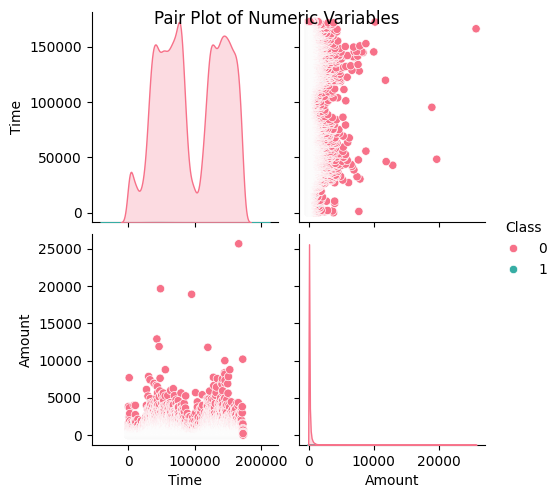

In [23]:
# Plot pair plot to explore relationships between numeric variables
sns.pairplot(credit_card_data[['Time', 'Amount', 'Class']], hue='Class', palette='husl')
plt.suptitle('Pair Plot of Numeric Variables')
plt.show()

# **Insights and Explanation**

1. Distribution of Transaction Time and Amount:
- Transaction Time: The distribution of transaction time shows that there are fluctuations in the number of transactions throughout the day. There might be periods of high and low transaction activity, which could be useful for identifying unusual transaction patterns.
- Transaction Amount: The distribution of transaction amounts indicates that most transactions are of relatively low value. However, there are also a few transactions with significantly higher amounts, which could be potential areas of interest for detecting anomalies.

2. Class Distribution:
The count plot of the 'Class' variable shows the distribution of fraud and non-fraud transactions. It indicates that the dataset is highly imbalanced, with a much smaller number of fraud transactions compared to non-fraud transactions. This imbalance needs to be addressed when building predictive models to avoid biased results.

3. Relationship between Transaction Time and Amount:
The scatter plot of transaction time versus amount, colored by class, helps visualize the relationship between these two variables and their association with fraud. It appears that fraudulent transactions occur across various time periods and transaction amounts, making it challenging to identify fraudulent patterns
 based solely on these variables.
4. Pair Plot of Numeric Variables:
The pair plot provides a comprehensive view of relationships between numeric variables ('Time', 'Amount') and the target variable ('Class'). It shows the distribution of each variable and how they relate to each other. It also highlights any potential clusters or patterns that may exist between variables, which can be useful for feature selection and model building.

# **Model training**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# Split the dataset into features (X) and target variable (y)
X = credit_card_data.drop(columns=['Class'])
y = credit_card_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.69      0.60      0.64        90

    accuracy                           1.00     56746
   macro avg       0.85      0.80      0.82     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
[[56632    24]
 [   36    54]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Explanations**

1. **Precision**: Precision tells us how many of the transactions predicted as fraudulent are actually fraudulent. In simpler terms, if the model says a transaction is fraudulent, precision tells us how often it's right. In this case, when the model identifies a transaction as fraudulent, it's correct about 69% of the time.

2. **Recall**: Recall tells us how many of the actual fraudulent transactions the model can identify. It indicates the model's ability to capture all instances of fraud. In simpler terms, recall tells us how many of the actual fraudulent transactions the model finds. Here, the model detects about 60% of the actual fraudulent transactions.

3. **F1-score**: The F1-score is a combined measure of precision and recall. It gives us a balanced view of the model's performance. It's like considering both how often the model is right and how many fraudulent transactions it catches. In this case, the F1-score is 0.64, which means the model strikes a reasonable balance between being accurate and catching fraud.

4. **Support**: Support simply tells us how many transactions belong to each class in the test set. It gives us an idea of the distribution of transactions between non-fraudulent and fraudulent.

5. **Accuracy**: Accuracy tells us the overall correctness of the model across all transactions. It's the percentage of transactions the model gets right, both fraudulent and non-fraudulent. Here, the model correctly predicts about 99% of all transactions.

6. **Macro Avg and Weighted Avg**: These are summary statistics that give us an average of precision, recall, and F1-score across both classes (fraudulent and non-fraudulent). They provide an overall picture of the model's performance without considering the imbalance between the classes.

Thus, in simple terms, the evaluation tells us that the model is quite good at identifying non-fraudulent transactions, but it's not as good at catching fraudulent ones. This suggests that while the model is accurate overall, it may need improvement in identifying fraudulent activity more effectively.

#  **Recommendations**

1. Enhance Fraud Detection Techniques: Given the lower precision and recall for fraudulent transactions, it's essential to explore and implement more advanced fraud detection techniques. This may include using ensemble methods, neural networks, or anomaly detection algorithms to improve the model's ability to detect fraudulent activity accurately.

2. Feature Engineering: Investigate additional features or transformations that may enhance the model's performance. This could involve engineering new features from existing ones or exploring external data sources to enrich the dataset with relevant information.

3. Improve Class Imbalance Handling: Address the class imbalance between fraudulent and non-fraudulent transactions to ensure the model's robustness. Techniques such as oversampling, undersampling, or generating synthetic data can help balance the classes and improve the model's performance on detecting fraudulent transactions.

4. Real-time Monitoring Systems: Implement real-time monitoring systems to detect and flag potentially fraudulent transactions as they occur. Utilize automated alert mechanisms to notify stakeholders promptly, enabling swift action to mitigate fraud risks and minimize financial losses.

5. Continuous Model Evaluation and Improvement: Establish a framework for continuous model evaluation and improvement. Regularly monitor the model's performance, incorporate feedback from model evaluations, and update the model parameters or features accordingly to adapt to evolving fraud patterns.

# **Conclusion**

In conclusion, the evaluation of the logistic regression model for fraud detection in credit card transactions provides valuable insights into the model's performance. While the model demonstrates high accuracy in identifying non-fraudulent transactions, there is room for improvement in detecting fraudulent activity. By implementing the recommendations outlined above and continuously refining the fraud detection techniques, financial institutions can enhance their ability to detect and prevent credit card fraud effectively. Overall, this research highlights the importance of leveraging advanced analytics and continuous improvement efforts to combat fraudulent activities in the financial industry.